In [21]:
"""
MNIST database of handwritten digits

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
"""
import keras
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
#shape is (60000, 28, 28)
# 60000 images, 28 pix by 28 pix
print(y_train.shape)
#shape is (60000, )

## Need to reshape our input so that each 28X28 image becomes and 784 dimensinal vector
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

nb_classes = 10
#We need to one hot encoding for the target
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

# We will build 3 layer fully connected network
"""
model = Sequential()

model.add(Dense(512,activation='relu',input_dim=784,)) ## relu will clamp all values below 0 to 0
model.add(Dropout(0.2)) # Dropout helps protect the model from memorizing or "overfitting" the training data

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

## output layer
model.add(Dense(10, activation='softmax')) #softmax ensures all non-negative and sums to 1
"""
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))  # An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.

model.add(Dropout(0.2))  # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))  # This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.

## compile our model

## optimizer helps how quickly a model learns
# Categorical cross entropy is used to compare two probability distributions. with softmax we are getting 10 outputs, 80% confident
## that it is 1, 5% for 2 and so on

#model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"]) #The cross-entropy is a measure of how different your predicted distribution is from the target distribution.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['categorical_accuracy'])
## Now its time to fit the model

model.fit(x_train, y_train,
          batch_size=128, epochs=4,
           verbose=2,
           validation_data=(x_test, y_test))


### Model Scoring/Evaluation

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', score)

(60000, 28, 28)
(60000,)
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
 - 14s - loss: 0.2856 - categorical_accuracy: 0.9126 - val_loss: 0.1363 - val_categorical_accuracy: 0.9568
Epoch 2/4
 - 13s - loss: 0.1151 - categorical_accuracy: 0.9648 - val_loss: 0.0871 - val_categorical_accuracy: 0.9707
Epoch 3/4
 - 13s - loss: 0.0792 - categorical_accuracy: 0.9751 - val_loss: 0.0745 - val_categorical_accuracy: 0.9767
Epoch 4/4
 - 13s - loss: 0.0601 - categorical_accuracy: 0.9820 - val_loss: 0.0660 - val_categorical_accuracy: 0.9795
Test score: [0.06602025395883247, 0.9795]
Test accuracy: [0.06602025395883247, 0.9795]


In [67]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

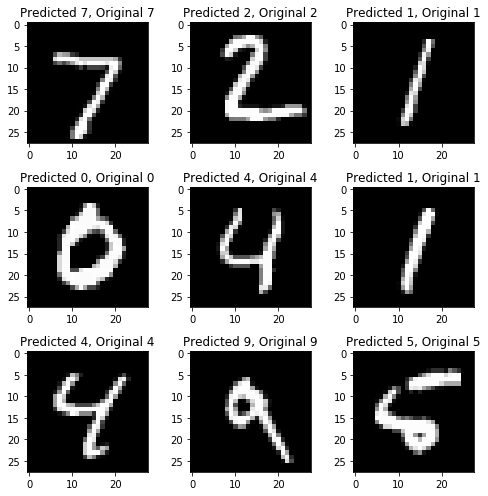

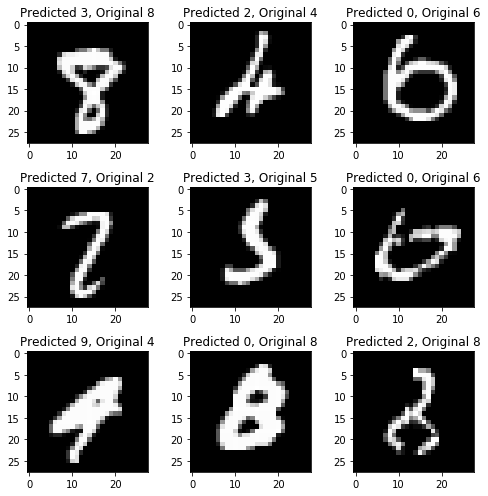

In [69]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)


# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

plt.figure()

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Original {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()
    
plt.figure()
plt.tight_layout()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Original {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

In [70]:
model.save('minst_mlp_model.h5')